<a href="https://colab.research.google.com/github/cateto/python4NLP/blob/main/colab/movie_sentiment_analysis_11_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import imdb

#이미 훈련, 테스트 데이터가 50:50로 구분되어 제공됨.

In [2]:
# 영화 리뷰는 X_train에, 감성 정보는 y_train에 저장된다.
# 테스트용 리뷰는 X_test에, 테스트용 리뷰의 감성 정보는 y_test에 저장된다.
(x_train, y_train), (x_test, y_test) = imdb.load_data()
# (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 10000)
#상위 10000건의 단어들만 사용.

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 


상위 몇개의 단어만 사용한다는 것은 무슨 의미???




In [3]:
print('훈련용 리뷰 개수 : {}'.format(len(x_train)))
print('테스트용 리뷰 개수 : {}'.format(len(x_test)))
num_classes = max(y_train) + 1
print('카테고리 : {}'.format(num_classes))

훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
카테고리 : 2


In [6]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


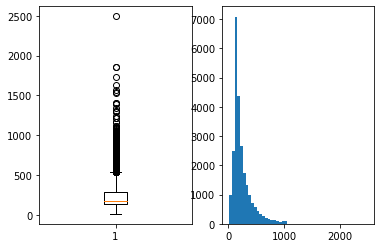

In [12]:
len_result = [len(s) for s in x_train]

print('리뷰의 최대 길이 : {}'.format(np.max(len_result)))
print('리뷰의 평균 길이 : {}'.format(np.mean(len_result)))

plt.subplot(1,2,1)
plt.boxplot(len_result)
plt.subplot(1,2,2)
plt.hist(len_result, bins=50)
plt.show()

In [13]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[    0     1]
 [12500 12500]]


In [14]:
word_to_index = imdb.get_word_index()
index_to_word={}
for key, value in word_to_index.items():
    index_to_word[value+3] = key

1646592/1641221 [==============================] - 0s 0us/step


In [15]:
print('빈도수 상위 1등 단어 : {}'.format(index_to_word[4]))

빈도수 상위 1등 단어 : the


In [16]:
print('빈도수 상위 3938등 단어 : {}'.format(index_to_word[3941]))

빈도수 상위 3938등 단어 : suited


In [18]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shoul

GRU로 감성분류하기!


In [19]:
import re
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [20]:
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [21]:
max_len = 500
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [22]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))

In [23]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1,save_best_only=True)

In [24]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
334/334 [==============================] - 268s 794ms/step - loss: 0.4973 - acc: 0.7678 - val_loss: 0.3554 - val_acc: 0.8484

Epoch 00001: val_acc improved from -inf to 0.84840, saving model to GRU_model.h5
Epoch 2/15
334/334 [==============================] - 266s 797ms/step - loss: 0.3128 - acc: 0.8744 - val_loss: 0.3397 - val_acc: 0.8736

Epoch 00002: val_acc improved from 0.84840 to 0.87360, saving model to GRU_model.h5
Epoch 3/15
334/334 [==============================] - 266s 797ms/step - loss: 0.2439 - acc: 0.9061 - val_loss: 0.4076 - val_acc: 0.8638

Epoch 00003: val_acc did not improve from 0.87360
Epoch 4/15
334/334 [==============================] - 266s 796ms/step - loss: 0.1916 - acc: 0.9280 - val_loss: 0.4188 - val_acc: 0.8636

Epoch 00004: val_acc did not improve from 0.87360
Epoch 5/15
334/334 [==============================] - 266s 796ms/step - loss: 0.1514 - acc: 0.9449 - val_loss: 0.4343 - val_acc: 0.8634

Epoch 00005: val_acc did not improve from 0.87360


In [26]:
loaded_model = load_model('GRU_model.h5')
print("\n 테스트 정확도 : %.4f"%(loaded_model.evaluate(x_test, y_test)[1]))

782/782 [==============================] - 84s 106ms/step - loss: 0.4443 - acc: 0.8626

 테스트 정확도 : 0.8626


모델 완료! 전처리 하는 함수 만들기!

In [27]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub('[^0-9a-zA-Z ]', '', new_sentence).lower() #알파벳 숫자 제외 모두 제거, 알파벳 소문자화
  
  #정수 인코딩
  encoded = []
  for word in new_sentence.split():
    # 단어 집합의 크기를 10,000으로 제한.
    try:
      if word_to_index[word] <= 10000:
        encoded.append(word_to_index[word]+3)
      else:
        # 10,000 이상의 숫자는 <unk> 토큰으로 취급.
        encoded.append(2)
    except KeyError:
      encoded.append(2)
  pad_new = pad_sequences([encoded], maxlen=max_len) # 기존에 정해진 렝쓰로 패딩
  score = float(loaded_model.predict(pad_new)) # 스코어 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [28]:
temp_str = "Cruella is simply put, phenomenal. A beautifully and artistically styled film that sets the perfect mood for the dark and cynical title character, the film just feels rebellious and makes you want to root for a true villain and horrific person. Emma Stone shows once again why she is so highly praised in the film community alongside a great performance from Emma Thompson who inserts her greatness in acting throughout the films entirety. Director Craig Gillespie has earned all his stripes in the film industry with films like I, Tonya and now Cruella, as his direction never fails to have intricately designed sets, costume designs and music choice. Gillespie truly knows what has to be done to truly fully immerse an audience in a story and environment and shows it off to perfection with this film. There is no doubt for a single second that Cruella is the best of the Disney live-action adaptations to date, and it will likely stay that way for many years to come."

sentiment_predict(temp_str)

98.28% 확률로 긍정 리뷰입니다.


In [29]:
temp_str2 = 'As disney shills flew en masse to salvage something for their overlords. The animated 101 Dalmatians stands the test of time. So trot out your live action flavors of the month and try to squeeze a dollar, they only prove their desperation. I was blessed to have raised my kids in a golden time of movie magic.'
sentiment_predict(temp_str2)

88.40% 확률로 부정 리뷰입니다.


In [30]:
temp_str3 = "Somehow Disney found an entire team of people who've never seen 101 Dalmatians, and forced them to write a prequel movie in an hour. Only good part of it was the costumes."

sentiment_predict(temp_str3)

97.30% 확률로 부정 리뷰입니다.
